<a href="https://colab.research.google.com/github/aidanrem/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

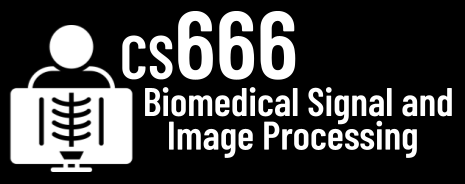

# Assignment 1

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [5]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset. Note: this might fail with an import error, but should be an easy fix :)

In [7]:
!pip install peakutils

In [8]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [18]:
SAMPLING_RATE = metadata['sampling_rate']
SECONDS = len(signal) / 1000

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [22]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

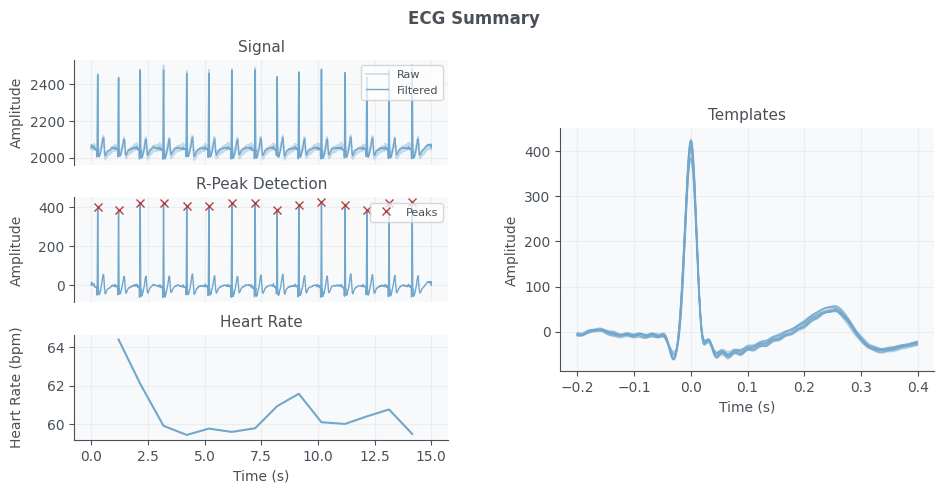

In [21]:
from biosppy.signals.ecg import ecg

processed_signal = ecg(signal, SAMPLING_RATE)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [29]:
processed_signal.keys()

['ts',
 'filtered',
 'rpeaks',
 'templates_ts',
 'templates',
 'heart_rate_ts',
 'heart_rate']

In [36]:
processed_signal['rpeaks']

array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

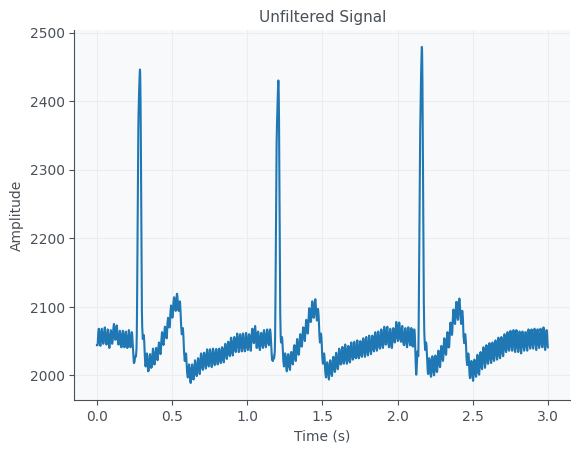

In [35]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 3, 1/SAMPLING_RATE)

plt.plot(t, signal[:len(t)])
plt.title('Unfiltered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

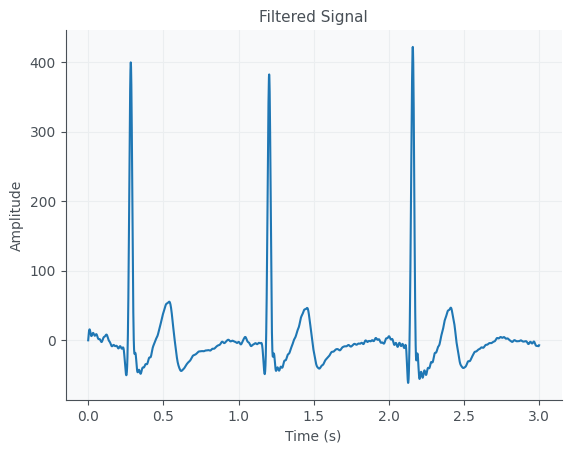

In [31]:
t = np.arange(0, 3, 1/SAMPLING_RATE)

plt.plot(t, processed_signal['filtered'][:len(t)])
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

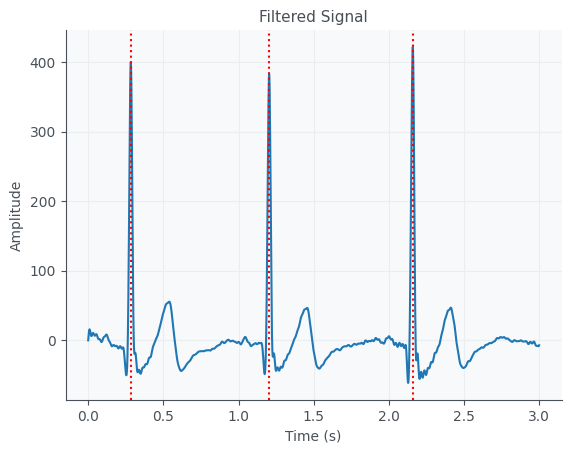

In [59]:
t = np.arange(0, 3, 1/SAMPLING_RATE)
filtered_peaks = processed_signal['rpeaks'][processed_signal['rpeaks']<3*SAMPLING_RATE]

plt.plot(t, processed_signal['filtered'][:len(t)])

for peak in filtered_peaks:
  plt.axvline(x = peak/SAMPLING_RATE, color = 'r', ls=':')
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

In [ ]:
# TODO Does the detection work well?

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [ ]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

In [ ]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#